In [33]:
import torch
from datasets import load_dataset
from transformers import AutoTokenizer, AutoModelForCausalLM, TrainingArguments, Trainer, GPT2Tokenizer, GPT2Model 

from tqdm import tqdm
import random
import numpy as np
import pandas as pd
import json
from sklearn.model_selection import train_test_split
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
path = "~/Desktop/masterprojet/"
name = "2022_public_lar_csv.csv"
selected_features = [
    "state_code",
    "derived_ethnicity",
    "derived_race",
    "derived_sex",
    "loan_amount",
    "combined_loan_to_value_ratio",
    "interest_rate",
    "rate_spread",
    "total_loan_costs",
    "origination_charges",
    "discount_points",
    "lender_credits",
    "loan_term",
    "property_value",
    "income",
    "debt_to_income_ratio",
    "applicant_credit_score_type",
    "co_applicant_credit_score_type",
    "applicant_ethnicity_1",
    "co_applicant_ethnicity_1",
    "applicant_ethnicity_observed",
    "co_applicant_ethnicity_observed",
    "applicant_race_1",
    "co_applicant_race_1",
    "applicant_race_observed",
    "co_applicant_race_observed",
    "applicant_sex",
    "co_applicant_sex",
    "applicant_sex_observed",
    "co_applicant_sex_observed",
    "applicant_age",
    "co_applicant_age",
    "tract_population",
    "tract_minority_population_percent",
    "ffiec_msa_md_median_family_income",
    "tract_to_msa_income_percentage",
    "tract_owner_occupied_units",
    "tract_one_to_four_family_homes",
    "tract_median_age_of_housing_units"
]

data = pd.read_csv(name, sep=',', header=0, nrows=30000, usecols=selected_features).reindex(columns=selected_features).dropna()

data

,state_code,derived_ethnicity,derived_race,derived_sex,loan_amount,combined_loan_to_value_ratio,interest_rate,rate_spread,total_loan_costs,origination_charges,...,co_applicant_sex_observed,applicant_age,co_applicant_age,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
10,CO,Not Hispanic or Latino,White,Male,175000,69.71,7.125,0.364,5321.81,3369.36,...,4,45-54,9999,3265,28.48,82500,77.0,712,1323,44
22,CA,Joint,White,Joint,955000,86.36,6.875,0.235,21715.85,14986.50,...,2,35-44,35-44,3927,72.70,91100,93.0,396,549,44
67,FL,Not Hispanic or Latino,Asian,Joint,245000,96.50,6.750,0.848,8185.23,1119.55,...,2,<25,25-34,3705,90.15,86100,46.0,549,1501,62
139,GA,Not Hispanic or Latino,Race Not Available,Male,185000,90.00,6.750,0.645,7894.36,2196.22,...,4,55-64,9999,5753,24.42,64100,125.0,1541,2189,44
155,VA,Ethnicity Not Available,Race Not Available,Female,85000,28.05,5.625,-1.047,5460.10,3926.15,...,4,>74,9999,5996,80.24,139700,63.0,1236,1618,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23512,MO,Not Hispanic or Latino,White,Male,135000,96.50,7.250,1.982,6960.15,2489.74,...,4,35-44,9999,5325,48.30,96800,63.0,1331,1758,48
23599,NV,Not Hispanic or Latino,White,Male,575000,95.00,5.875,-0.416,10218.40,7940.00,...,4,45-54,9999,4690,44.54,81700,96.0,777,1341,24
24026,TN,Not Hispanic or Latino,White,Joint,85000,22.86,5.875,-0.428,3282.54,2101.33,...,2,35-44,35-44,3920,18.11,82000,88.0,1291,1650,36
24536,TX,Not Hispanic or Latino,Asian,Female,515000,80.00,6.125,-0.341,11648.50,6785.00,...,2,25-34,25-34,6403,86.23,97400,97.0,1455,1861,20


       loan_amount  combined_loan_to_value_ratio  interest_rate  rate_spread  \
10        175000.0                         69.71          7.125        0.364   
22        955000.0                         86.36          6.875        0.235   
67        245000.0                         96.50          6.750        0.848   
139       185000.0                         90.00          6.750        0.645   
155        85000.0                         28.05          5.625       -1.047   
...            ...                           ...            ...          ...   
23512     135000.0                         96.50          7.250        1.982   
23599     575000.0                         95.00          5.875       -0.416   
24026      85000.0                         22.86          5.875       -0.428   
24536     515000.0                         80.00          6.125       -0.341   
24810     305000.0                         95.00          6.499        0.417   

       total_loan_costs  origination_ch

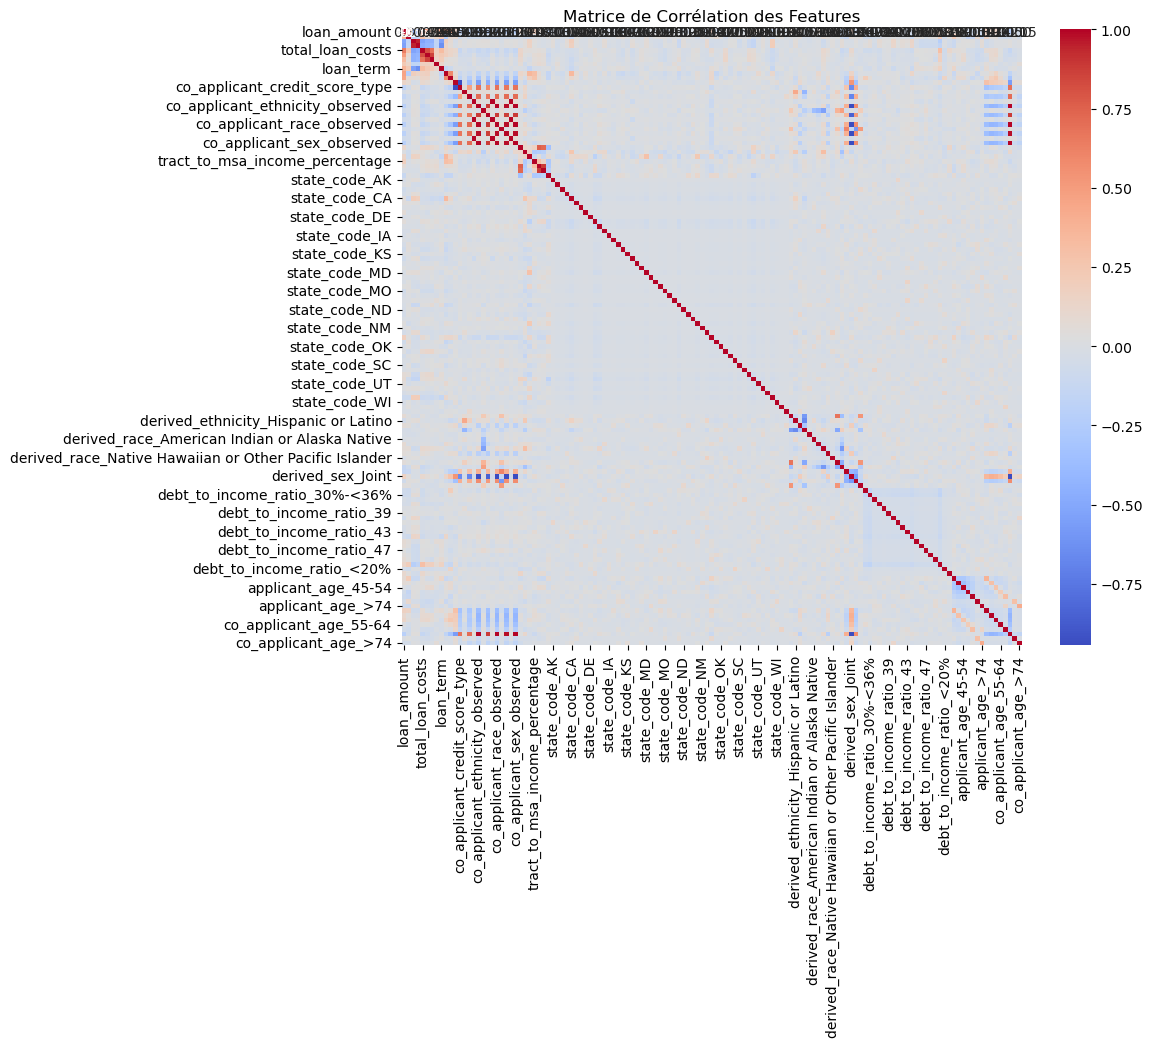

In [39]:
categorical_columns = data.select_dtypes(include='object').columns
df_encoded = pd.get_dummies(data, columns=categorical_columns)
print(df_encoded)

corr_matrix = df_encoded.corr()

# Afficher la matrice de corrélation avec Seaborn
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matrice de Corrélation des Features')
plt.show()

In [ ]:
#create subfeatures that are most relevant

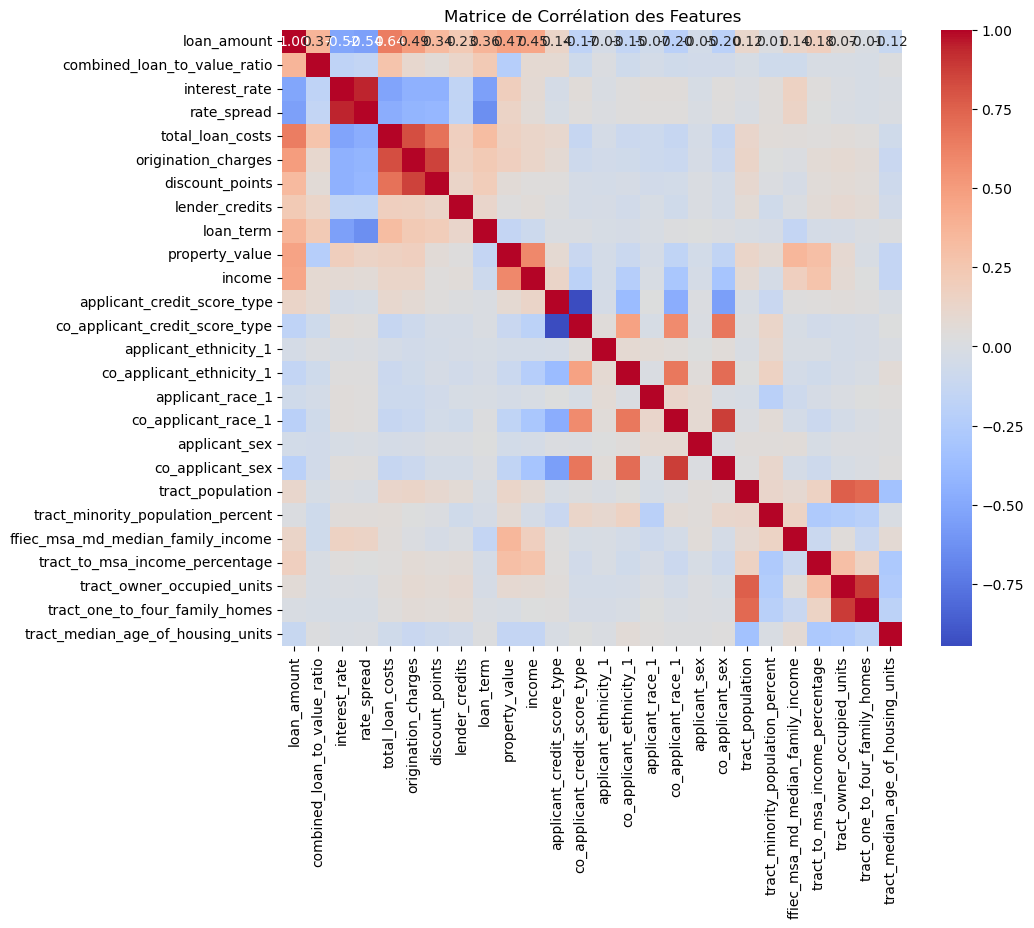

In [36]:
# Calculer la matrice de corrélation
feature2 = [
    "loan_amount",
    "combined_loan_to_value_ratio",
    "interest_rate",
    "rate_spread",
    "total_loan_costs",
    "origination_charges",
    "discount_points",
    "lender_credits",
    "loan_term",
    "property_value",
    "income",
    "applicant_credit_score_type",
    "co_applicant_credit_score_type",
    "applicant_ethnicity_1",
    "co_applicant_ethnicity_1",
    "applicant_race_1",
    "co_applicant_race_1",
    "applicant_sex",
    "co_applicant_sex",
    "tract_population",
    "tract_minority_population_percent",
    "ffiec_msa_md_median_family_income",
    "tract_to_msa_income_percentage",
    "tract_owner_occupied_units",
    "tract_one_to_four_family_homes",
    "tract_median_age_of_housing_units"]
for feature in feature2:
  data[feature] = data[feature].astype(str)
  data = data[~data[feature].str.contains("exempt", case=False, na=False)]
  data[feature] = data[feature].astype(float)
    
corr_matrix = data[feature2].corr()

# Afficher la matrice de corrélation avec Seaborn
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matrice de Corrélation des Features')
plt.show()

In [ ]:
#missing age and debt because there are alphabetical characters in the columns and idk how to remove the 'exempts' etc.
#Link between credit score and ethnicity
#link between credit score and sex
#loan_amount correlated with property_value
#negative correlation between applicant credit score type and co applicant credit score type
#co-applicant ?
#give definitions of each variables https://ffiec.cfpb.gov/documentation/publications/loan-level-datasets/panel-data-fields